<a href="https://colab.research.google.com/github/farihane-redouan/BASIC-ALGORITHMS-MACHINE-DEEP-LEARNING/blob/main/Basic_machine_learning5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons # ne sont pas linearement separable
from sklearn.datasets import make_blobs #linearment separable

# **1.DataSet**
## **1.1 Non Linéairement Séparable**

In [ ]:
nb_obs=100
nb_cara=2
x,y=make_moons(n_samples=nb_obs,noise=0.1)
y=y.reshape(y.shape[0],1)

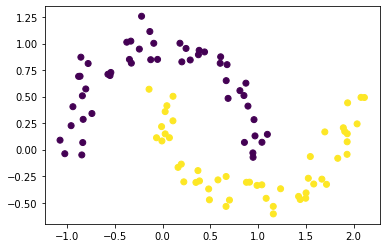

In [ ]:
plt.scatter(x[:,0],x[:,1], c=y)

In [ ]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3)

## **1.2 Linéairement Séparable**

In [ ]:
x_,y_=make_blobs(n_samples=100,n_features=2,centers=4)
y_=y_.reshape(y_.shape[0],1)
np.shape(x_)

(100, 2)

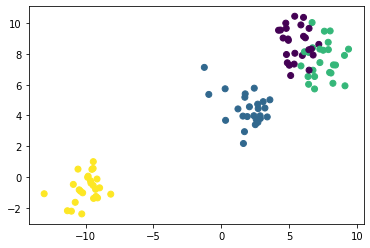

In [ ]:
plt.scatter(x_[:,0],x_[:,1], c=y_)

In [ ]:
from sklearn.model_selection import train_test_split 
x__train, x__test, y__train, y__test=train_test_split(x_,y_,test_size=0.3)
print(y__test)

[[1]
 [0]
 [1]
 [2]
 [2]
 [2]
 [2]
 [3]
 [1]
 [1]
 [3]
 [3]
 [0]
 [0]
 [1]
 [2]
 [2]
 [0]
 [2]
 [1]
 [2]
 [3]
 [2]
 [0]
 [2]
 [1]
 [3]
 [0]
 [1]
 [2]]


In [ ]:
#Encodage des donnees
from keras.utils import np_utils
y__train=np_utils.to_categorical(y__train,4) 
y__test=np_utils.to_categorical(y__test,4)
print(y__test,np.shape(y__test))

[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]] (30, 4)


# **2.Modèle Reseaux de norons**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
def NAN1(x_dim):
   model=Sequential()
   #architecture
   model.add(Dense(3,activation="sigmoid", input_dim=x_dim)) #Ajouter une cache cauché composée de 3 neurones
   model.add(Dense(1,activation="sigmoid")) # Une seule variable de prédiction
   return model

In [ ]:
def NAN2(x_dim):
   model=Sequential()
   #architecture
   model.add(Dense(64,activation="relu", input_dim=x_dim)) #Ajouter une cache cauché composée de 64 neurones
   model.add(Dense(32,activation="relu")) #Ajouter une cache cauché composée de 32 neurones
   model.add(Dense(4,activation="softmax")) # 4 variable de prédiction
   return model

In [ ]:
model1=NAN1(2)
model2=NAN2(2)
model1.compile(loss = "binary_crossentropy", optimizer ='sgd',metrics = ["accuracy"]) #compilation - algorithme d'apprentissage
model2.compile(loss = "categorical_crossentropy", optimizer ='adam',metrics = ["accuracy"])

In [ ]:
model1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=400,batch_size=10)

Epoch 1/400
7/7 [==============================] - 0s 17ms/step - loss: 0.9131 - accuracy: 0.4857 - val_loss: 0.8467 - val_accuracy: 0.5333
Epoch 2/400
7/7 [==============================] - 0s 3ms/step - loss: 0.8992 - accuracy: 0.4857 - val_loss: 0.8354 - val_accuracy: 0.5333
Epoch 3/400
7/7 [==============================] - 0s 3ms/step - loss: 0.8861 - accuracy: 0.4857 - val_loss: 0.8247 - val_accuracy: 0.5333
Epoch 4/400
7/7 [==============================] - 0s 3ms/step - loss: 0.8738 - accuracy: 0.4857 - val_loss: 0.8147 - val_accuracy: 0.5333
Epoch 5/400
7/7 [==============================] - 0s 3ms/step - loss: 0.8621 - accuracy: 0.4857 - val_loss: 0.8053 - val_accuracy: 0.5333
Epoch 6/400
7/7 [==============================] - 0s 3ms/step - loss: 0.8513 - accuracy: 0.4857 - val_loss: 0.7965 - val_accuracy: 0.5333
Epoch 7/400
7/7 [==============================] - 0s 3ms/step - loss: 0.8408 - accuracy: 0.4857 - val_loss: 0.7882 - val_accuracy: 0.5333
Epoch 8/400
7/7 [=========

In [ ]:
model2.fit(x__train,y__train,validation_data=(x__test,y__test),epochs=400,batch_size=10)

Epoch 1/400
7/7 [==============================] - 0s 19ms/step - loss: 0.0410 - accuracy: 0.9857 - val_loss: 0.9432 - val_accuracy: 0.8333
Epoch 2/400
7/7 [==============================] - 0s 4ms/step - loss: 0.0449 - accuracy: 0.9714 - val_loss: 0.9593 - val_accuracy: 0.8333
Epoch 3/400
7/7 [==============================] - 0s 4ms/step - loss: 0.0394 - accuracy: 0.9857 - val_loss: 0.9949 - val_accuracy: 0.8333
Epoch 4/400
7/7 [==============================] - 0s 4ms/step - loss: 0.0424 - accuracy: 0.9857 - val_loss: 0.9736 - val_accuracy: 0.8333
Epoch 5/400
7/7 [==============================] - 0s 4ms/step - loss: 0.0394 - accuracy: 0.9857 - val_loss: 0.9071 - val_accuracy: 0.8333
Epoch 6/400
7/7 [==============================] - 0s 4ms/step - loss: 0.0431 - accuracy: 0.9714 - val_loss: 0.8988 - val_accuracy: 0.8333
Epoch 7/400
7/7 [==============================] - 0s 4ms/step - loss: 0.0469 - accuracy: 0.9857 - val_loss: 0.9265 - val_accuracy: 0.8000
Epoch 8/400
7/7 [=========

In [ ]:
score = model1.evaluate(x_test,y_test)
print(score)

1/1 [==============================] - 0s 1ms/step - loss: 0.6565 - accuracy: 0.7333
[0.6564502716064453, 0.7333333492279053]
